In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Wczytanie danych

In [78]:
data = pd.read_csv('Fifa2022-Males-1.csv')

C:\Users\jkobo\AppData\Local\Temp\ipykernel_9332\88336045.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Fifa2022-Males-1.csv')


## Podstawowe informacje

In [79]:
data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,lw,rw
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000,18913.000000,18913.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962,55.466187,55.466187
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563,14.676659,14.676659
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,14.000000,14.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000,50.000000,50.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000,59.000000,59.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000,65.000000,65.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000,92.000000,92.000000


In [80]:
data.shape

(19239, 104)

In [81]:
data.head(5)

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [82]:
list(data.columns)

['sofifa_id',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'moveme

In [83]:
goalkeeping_attributes = ['goalkeeping_reflexes', 'goalkeeping_speed', 'goalkeeping_positioning', 'goalkeeping_kicking', 'goalkeeping_handling', 'goalkeeping_diving']
defending_attributes = ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']
irrelevant_attributes = ['sofifa_id', 'club_team_id', 'club_jersey_number', 'nation_jersey_number', 'dob', 'club_position', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position', 'real_face', 'club_loaned_from', 'club_joined']
string_attributes = ['short_name', 'long_name', 'player_tags',	'player_traits', 'club_name', 'league_name']
correlated_with_wage_eur = ['value_eur', 'international_reputation', 'overall', 'release_clause_eur', 'potential', 'movement_reactions']

## One-hot encoding zmiennych kategorycznych
pozycja:

In [84]:
pos_label = 'player_positions'
df_one_hot = data[pos_label].str.get_dummies(', ')

data = pd.concat([data, df_one_hot], axis=1)
data = data.drop(columns=[pos_label])


dominująca noga:

In [85]:
pos_label = 'preferred_foot'
df_one_hot = data[pos_label].str.get_dummies()

data = pd.concat([data, df_one_hot], axis=1)
data = data.drop(columns=[pos_label])


In [86]:
data = data[data['GK'] == 0]
data

,sofifa_id,short_name,long_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,LM,LW,LWB,RB,RM,RW,RWB,ST,Left,Right
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,1987-06-24,170,...,0,0,0,0,0,1,0,1,1,0
1,188545,R. Lewandowski,Robert Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,...,0,0,0,0,0,0,0,1,0,1
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,1985-02-05,187,...,0,1,0,0,0,0,0,1,0,1
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,1992-02-05,175,...,0,1,0,0,0,0,0,0,0,1
4,192985,K. De Bruyne,Kevin De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,Song Defu,宋德福,47,52,70000.0,1000.0,22,1999-01-02,180,...,0,0,0,0,0,0,0,0,0,1
19235,262040,C. Porter,Caoimhin Porter,47,59,110000.0,500.0,19,2002-03-18,175,...,0,0,0,0,0,0,0,0,0,1
19236,262760,N. Logue,Nathan Logue-Cunningham,47,55,100000.0,500.0,21,2000-02-07,178,...,0,0,0,0,0,0,0,0,0,1
19237,262820,L. Rudden,Luke Rudden,47,60,110000.0,500.0,19,2002-04-23,173,...,0,0,0,0,0,0,0,1,0,1


In [87]:
data = data.drop(goalkeeping_attributes, axis = 1)
data = data.drop(defending_attributes[1:], axis = 1)
data = data.drop(irrelevant_attributes, axis = 1)
data = data.drop(string_attributes, axis = 1)
data = data.drop(correlated_with_wage_eur, axis = 1)
column_with_nan = 'wage_eur'

data = data.dropna(subset=[column_with_nan])

data

,wage_eur,age,height_cm,weight_kg,league_level,nationality_name,weak_foot,skill_moves,work_rate,body_type,...,LM,LW,LWB,RB,RM,RW,RWB,ST,Left,Right
0,320000.0,34,170,72,1.0,Argentina,4,4,Medium/Low,Unique,...,0,0,0,0,0,1,0,1,1,0
1,270000.0,32,185,81,1.0,Poland,4,4,High/Medium,Unique,...,0,0,0,0,0,0,0,1,0,1
2,270000.0,36,187,83,1.0,Portugal,4,5,High/Low,Unique,...,0,1,0,0,0,0,0,1,0,1
3,270000.0,29,175,68,1.0,Brazil,5,5,High/Medium,Unique,...,0,1,0,0,0,0,0,0,0,1
4,350000.0,30,181,70,1.0,Belgium,5,4,High/High,Unique,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,1000.0,22,180,64,1.0,China PR,3,2,Medium/Medium,Lean (170-185),...,0,0,0,0,0,0,0,0,0,1
19235,500.0,19,175,70,1.0,Republic of Ireland,3,2,Medium/Medium,Lean (170-185),...,0,0,0,0,0,0,0,0,0,1
19236,500.0,21,178,72,1.0,Republic of Ireland,3,2,Medium/Medium,Lean (170-185),...,0,0,0,0,0,0,0,0,0,1
19237,500.0,19,173,66,1.0,Republic of Ireland,3,2,Medium/Medium,Lean (170-185),...,0,0,0,0,0,0,0,1,0,1


## Brakujące dane

In [89]:
empty_data = data.isna().sum().sort_values(ascending=False).reset_index(drop = False).rename(columns={"index": "Column", 0: 'Count'})
empty_data['Percentage'] = (empty_data['Count'] / len(data)) * 100
empty_data.head(10)

,Column,Count,Percentage
0,lw,326,1.911575
1,rw,326,1.911575
2,wage_eur,0,0.000000
3,cm,0,0.000000
4,rwb,0,0.000000
5,rdm,0,0.000000
6,cdm,0,0.000000
7,ldm,0,0.000000
8,lwb,0,0.000000
9,rm,0,0.000000


## Zarobki w zależności od ligii

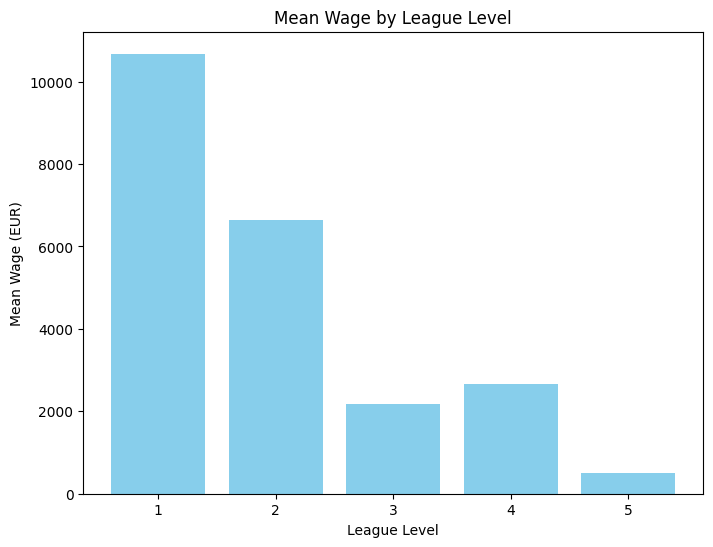

In [90]:
mean_wage_by_league = data.groupby('league_level')['wage_eur'].mean()

# Extract league levels and mean wages
league_levels = mean_wage_by_league.index
mean_wages = mean_wage_by_league.values

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(league_levels, mean_wages, color='skyblue')
plt.xlabel('League Level')
plt.ylabel('Mean Wage (EUR)')
plt.title('Mean Wage by League Level')
plt.show()

## Dystrybucja zarobków i wartości zawodników

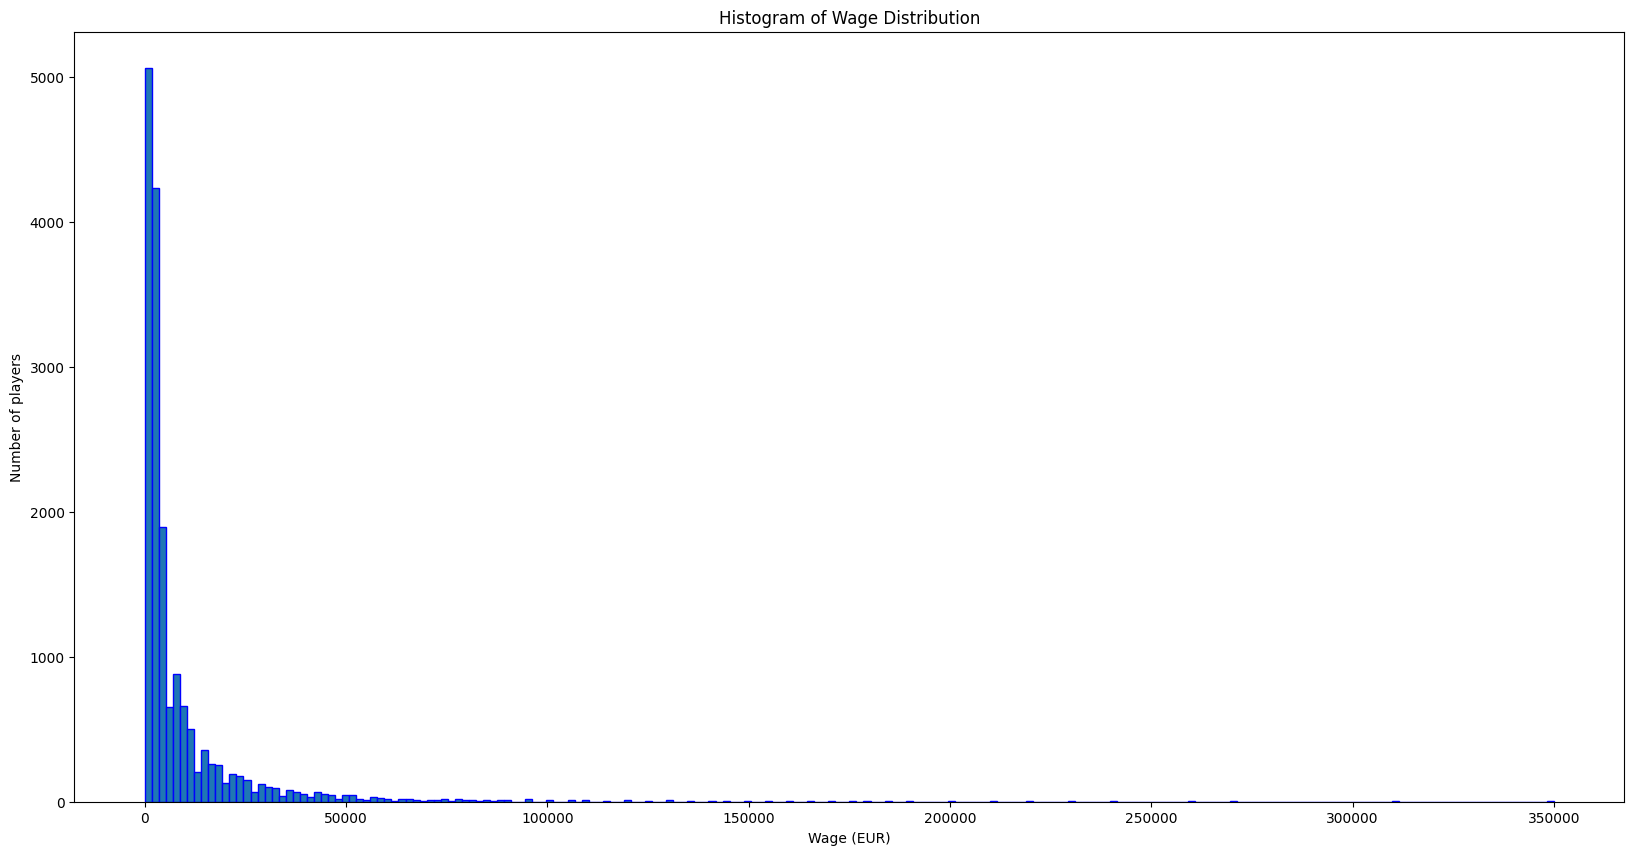

In [91]:
num_bins = 200

hist_range = (0, data['wage_eur'].max())

plt.figure(figsize=(20,10))
plt.hist(data['wage_eur'], bins=num_bins, range=hist_range, edgecolor='blue')

plt.xlabel('Wage (EUR)')
plt.ylabel('Number of players')
plt.title('Histogram of Wage Distribution')

plt.show()

## Dystrybucje wieku, wzrostu, wagi i poziomu ligii

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>],
       [<Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'league_level'}>]], dtype=object)

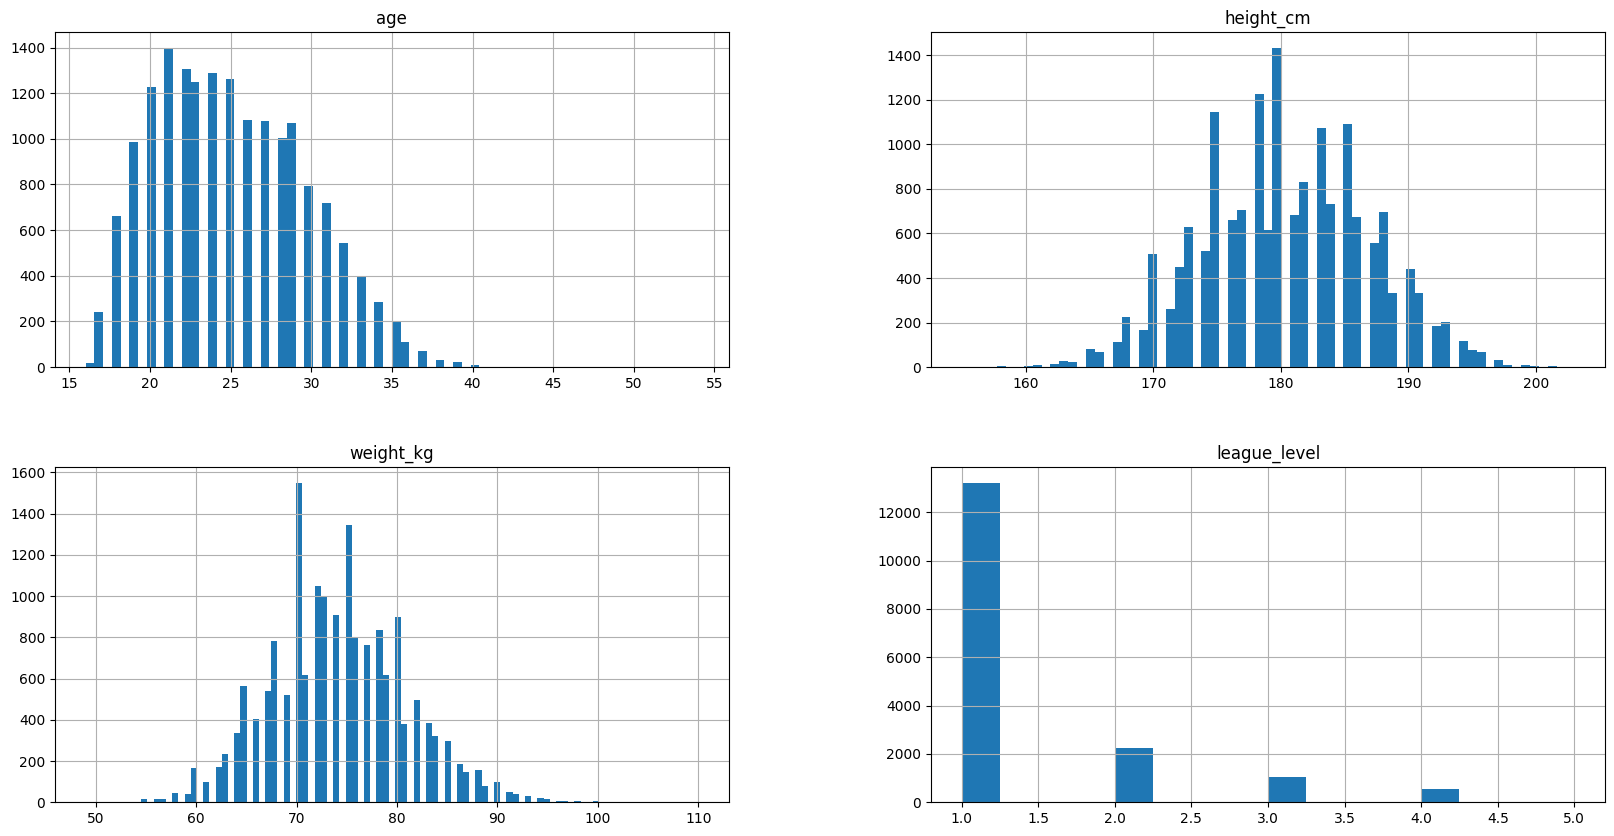

In [94]:
dataShort = data[['age', 'height_cm', 'weight_kg', 'league_level']]
dataShort.hist(bins='auto', figsize=(20, 10))

## Korelacja atrybutów

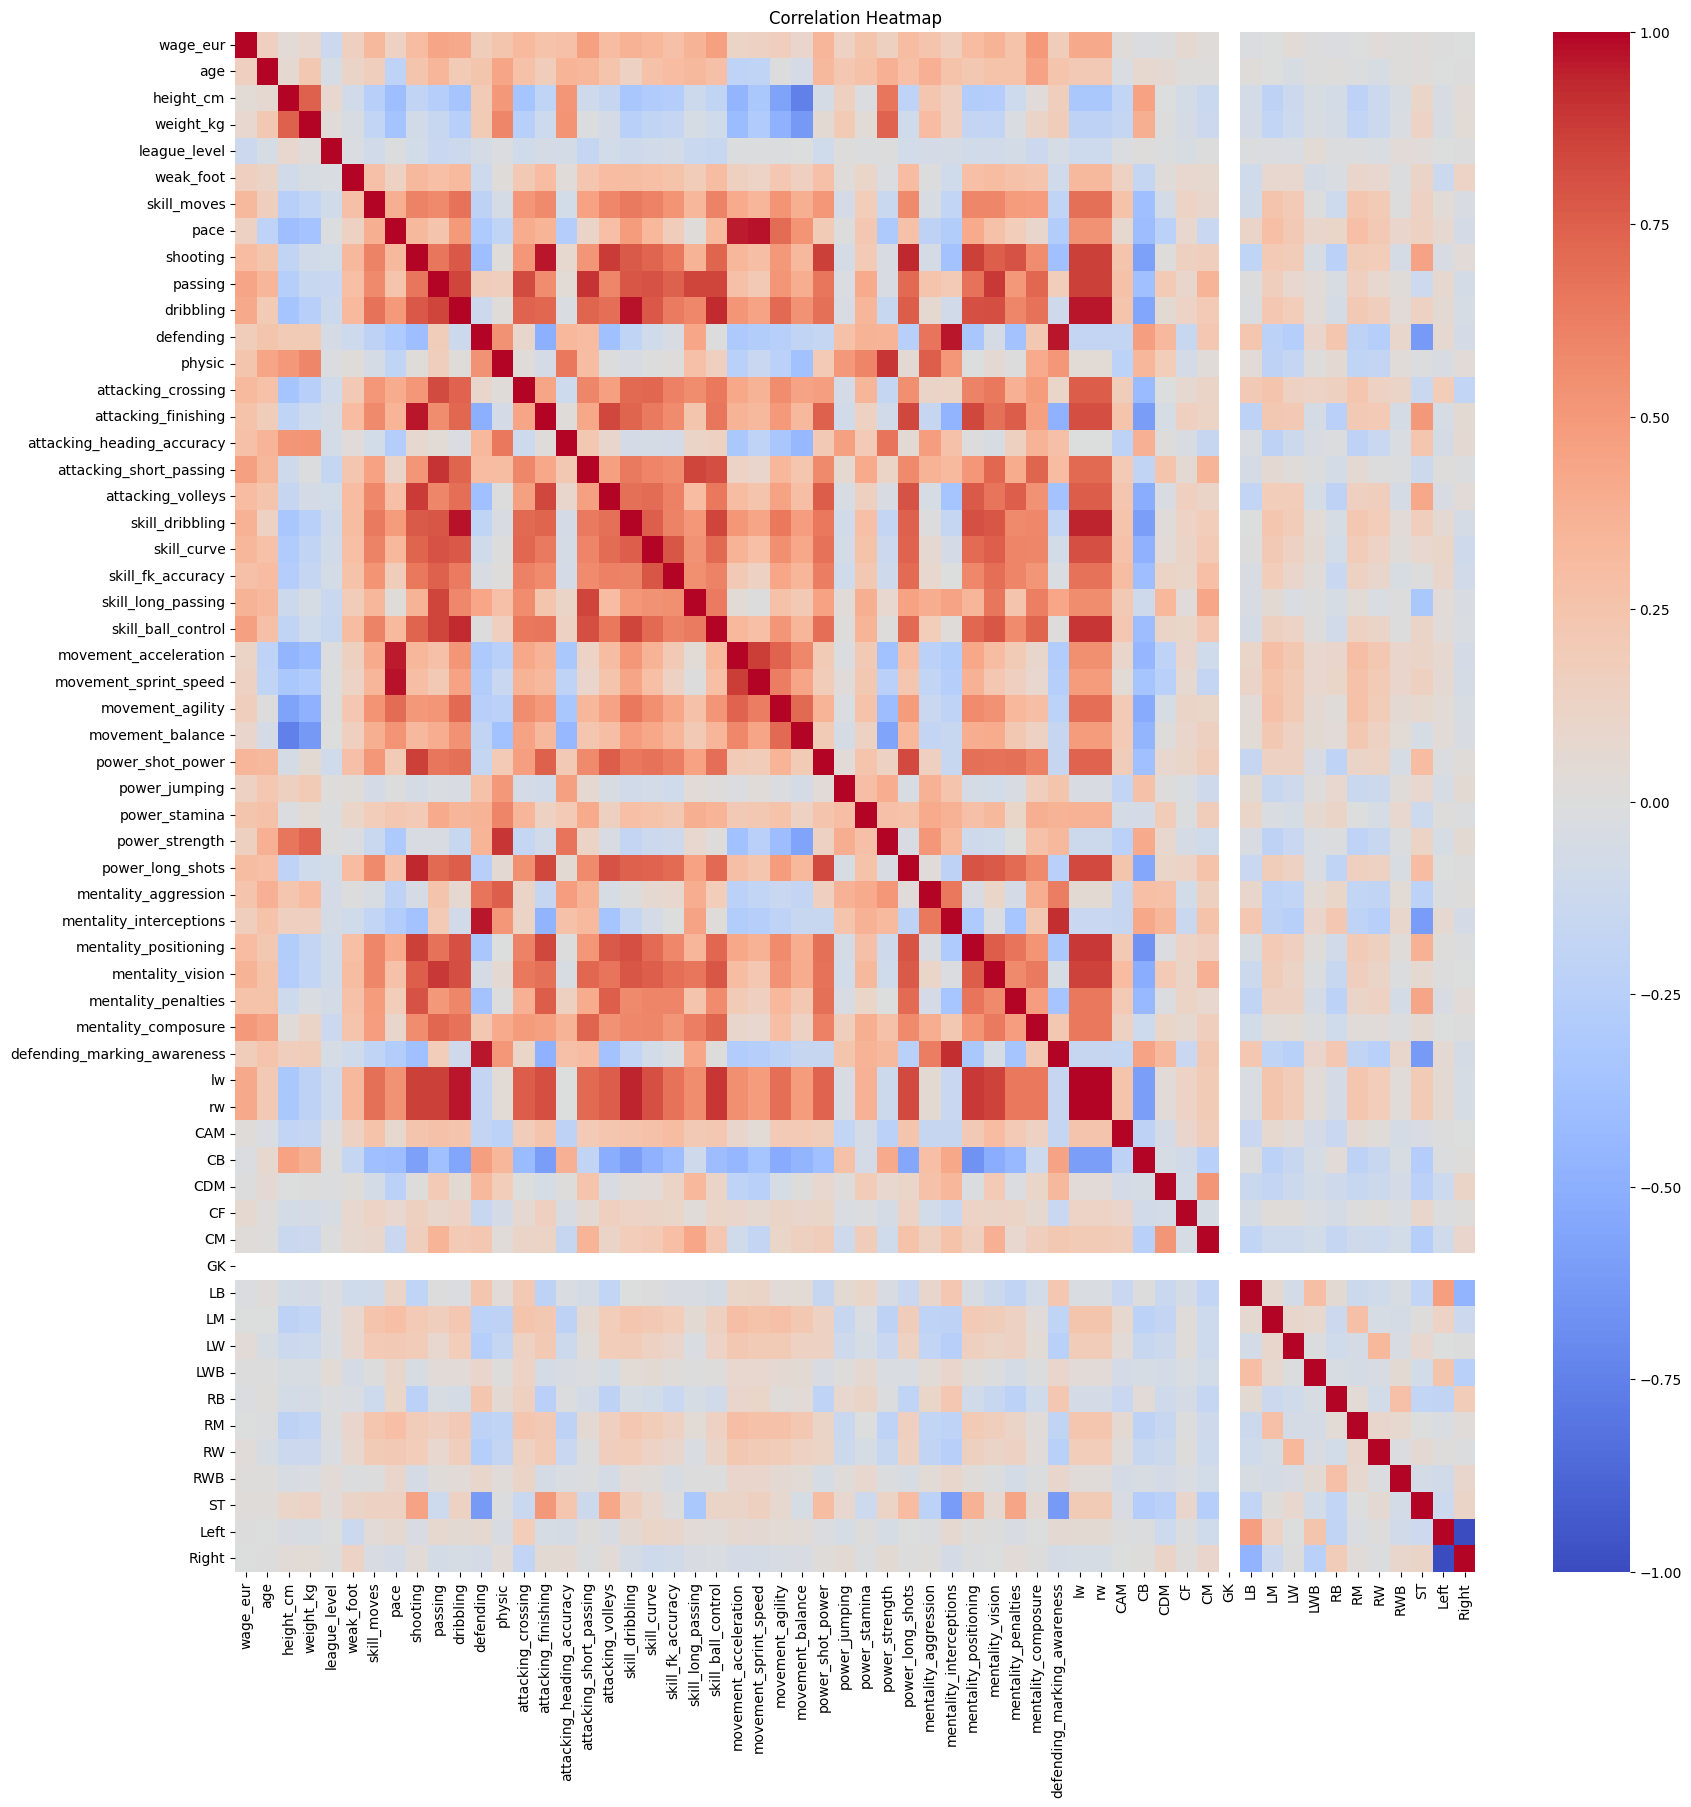

In [95]:
dataNumeric = data.select_dtypes(include=['number'])

correlation_matrix = dataNumeric.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

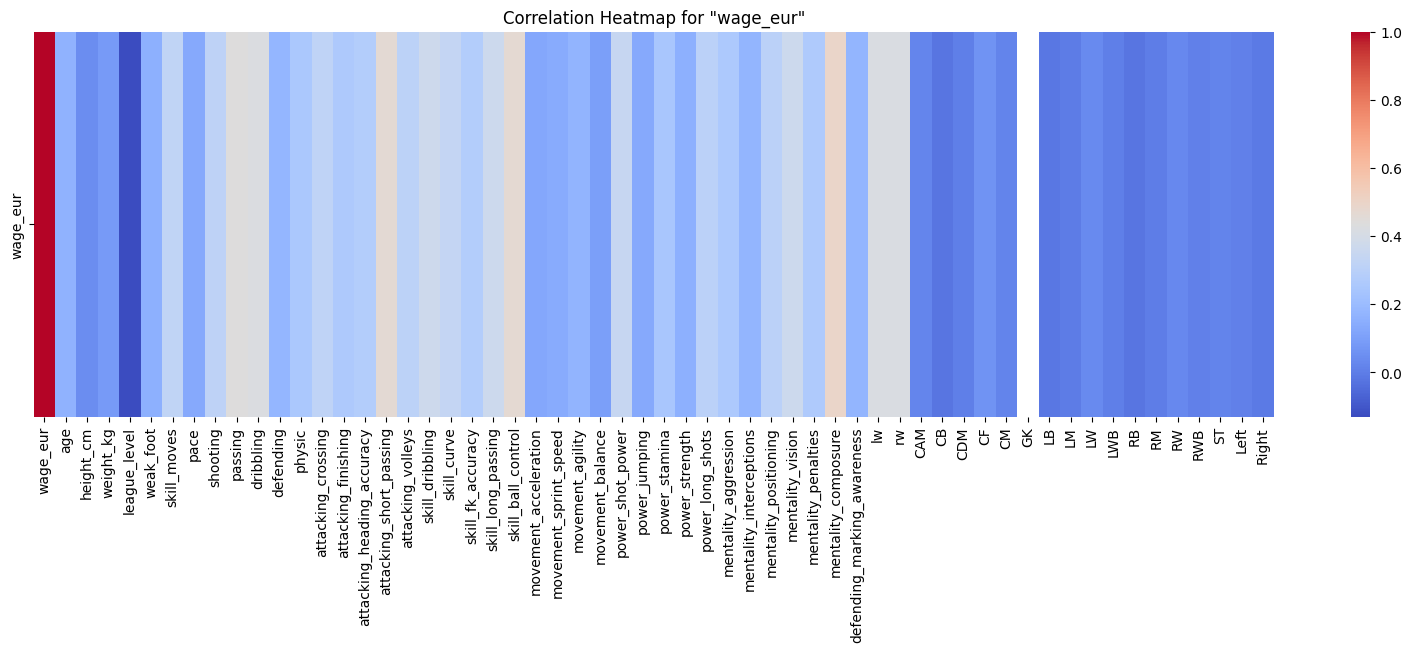

In [96]:
attributes_of_interest = ['wage_eur']
selected_attributes = attributes_of_interest + [col for col in dataNumeric.columns if col not in attributes_of_interest]

subset_correlation_matrix = correlation_matrix.loc[attributes_of_interest, selected_attributes]

plt.figure(figsize=(20, 5))
sns.heatmap(subset_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for "wage_eur"')
plt.show()

## Lista najbardziej skorelowanych atrybutów

In [97]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top_correlations = corr_pairs.abs().sort_values(ascending=False).head(50)
top_correlations

Right                        Left                           1.000000
Left                         Right                          1.000000
lw                           rw                             1.000000
rw                           lw                             1.000000
pace                         movement_sprint_speed          0.972210
movement_sprint_speed        pace                           0.972210
skill_dribbling              dribbling                      0.972156
dribbling                    skill_dribbling                0.972156
mentality_interceptions      defending                      0.968043
defending                    mentality_interceptions        0.968043
shooting                     attacking_finishing            0.967780
attacking_finishing          shooting                       0.967780
defending                    defending_marking_awareness    0.967652
defending_marking_awareness  defending                      0.967652
dribbling                    lw   

In [98]:
# Calculate the correlation matrix
correlation_matrix = dataNumeric.corr()

# Find columns with high correlation
high_corr_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            high_corr_columns.add(colname)

high_corr_columns

{'Right',
 'attacking_finishing',
 'defending_marking_awareness',
 'lw',
 'mentality_interceptions',
 'movement_acceleration',
 'movement_sprint_speed',
 'power_long_shots',
 'rw',
 'skill_ball_control',
 'skill_dribbling'}

## PCA

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [100]:
# standarize data and remove NaNs
numericColumns = dataNumeric.select_dtypes(include='number').columns.tolist()
dataNoNans = dataNumeric[numericColumns].fillna(0, inplace=False)
dataNoNans[numericColumns] = StandardScaler().fit_transform(dataNoNans[numericColumns])
dataNoNans

,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,pace,shooting,passing,...,LM,LW,LWB,RB,RM,RW,RWB,ST,Left,Right
0,15.631363,1.928162,-1.587187,-0.312176,-0.475266,1.537047,2.320583,1.535731,2.822688,3.346368,...,-0.415815,-0.268903,-0.172356,-0.376976,-0.407242,3.687957,-0.165937,2.007285,1.716616,-1.716616
1,13.115449,1.495908,0.704721,1.032042,-0.475266,1.537047,2.320583,0.895196,2.822688,2.154746,...,-0.415815,-0.268903,-0.172356,-0.376976,-0.407242,-0.271153,-0.165937,2.007285,-0.582541,0.582541
2,13.115449,2.360416,1.010308,1.330757,-0.475266,1.537047,3.889285,1.718740,2.965013,2.254048,...,-0.415815,3.718812,-0.172356,-0.376976,-0.407242,-0.271153,-0.165937,2.007285,-0.582541,0.582541
3,13.115449,0.847526,-0.823218,-0.909606,-0.475266,3.076079,3.889285,2.084760,2.182227,2.849859,...,-0.415815,3.718812,-0.172356,-0.376976,-0.407242,-0.271153,-0.165937,-0.498185,-0.582541,0.582541
4,17.140912,1.063653,0.093545,-0.610891,-0.475266,3.076079,2.320583,0.712186,2.395714,3.544972,...,-0.415815,-0.268903,-0.172356,-0.376976,-0.407242,-0.271153,-0.165937,-0.498185,-0.582541,0.582541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,-0.420172,-0.665363,-0.059249,-1.507036,-0.475266,-0.001985,-0.816822,-0.934902,-1.233566,-1.122214,...,-0.415815,-0.268903,-0.172356,-0.376976,-0.407242,-0.271153,-0.165937,-0.498185,-0.582541,0.582541
19235,-0.445331,-1.313744,-0.823218,-0.610891,-0.475266,-0.001985,-0.816822,-0.843397,-0.948916,-0.725007,...,-0.415815,-0.268903,-0.172356,-0.376976,-0.407242,-0.271153,-0.165937,-0.498185,-0.582541,0.582541
19236,-0.445331,-0.881490,-0.364836,-0.312176,-0.475266,-0.001985,-0.816822,-0.751892,-1.091241,-1.221516,...,-0.415815,-0.268903,-0.172356,-0.376976,-0.407242,-0.271153,-0.165937,-0.498185,-0.582541,0.582541
19237,-0.445331,-1.313744,-1.128805,-1.208321,-0.475266,-0.001985,-0.816822,-0.019853,-0.450780,-2.115233,...,-0.415815,-0.268903,-0.172356,-0.376976,-0.407242,-0.271153,-0.165937,2.007285,-0.582541,0.582541


In [101]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0, n_components=len(numericColumns))
dataTransformed = pca.fit_transform(dataNoNans)
df_transformed = pd.DataFrame(
        data = dataTransformed,
        columns = numericColumns
    ) 
n_components = len(pca.components_)
pca_cols = [f'PC{x+1}' for x in range(n_components)]
df_pca_components = pd.DataFrame(data = np.transpose(pca.components_), columns=pca_cols, index=dataNumeric.columns)
df_pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
wage_eur,0.098398,0.123865,0.009636,-0.094847,-0.030576,1.508656e-01,-0.190837,0.101652,-3.440133e-02,0.243047,...,3.976704e-05,1.612454e-03,-4.341500e-03,1.228381e-04,-4.186556e-04,-2.246545e-07,3.050102e-05,6.846668e-17,-0.000000e+00,0.000000e+00
age,0.056051,0.179812,0.076182,-0.021298,0.045903,2.026343e-01,0.319338,0.006032,2.417633e-01,-0.169437,...,-1.338253e-02,-1.910130e-02,-2.916542e-03,2.210181e-04,-4.727672e-04,-2.422646e-04,-1.640687e-05,-1.302719e-16,-1.280995e-16,8.985515e-18
height_cm,-0.095604,0.155027,0.239018,-0.097414,0.061072,1.299051e-02,-0.183772,-0.096772,-2.233179e-01,-0.116265,...,5.822576e-03,-3.802802e-03,7.296972e-04,-3.389603e-04,-4.637605e-04,-1.633272e-04,3.281193e-04,1.080858e-17,-2.439736e-17,2.965063e-17
weight_kg,-0.067248,0.174913,0.245408,-0.120024,0.047420,3.469742e-02,-0.105245,-0.093533,-1.735759e-01,-0.140120,...,-2.009088e-03,6.159938e-04,-1.330925e-03,-5.200962e-04,-4.296480e-04,3.332590e-05,-3.434541e-04,-8.167025e-17,-1.376592e-16,1.317082e-16
league_level,-0.028649,-0.031855,0.011479,-0.012130,-0.009590,-2.007707e-01,0.164143,-0.072141,-7.562131e-02,-0.485373,...,-3.557111e-03,1.382157e-03,7.158031e-04,-2.172607e-04,-5.951127e-05,-4.275766e-05,-1.771484e-04,-5.299574e-17,-2.531679e-17,-5.692262e-17
weak_foot,0.087824,0.007759,0.050146,0.025346,-0.099525,1.124991e-01,0.056100,0.113573,-4.296337e-02,-0.040697,...,-6.201150e-03,-3.743867e-03,4.970423e-04,2.980403e-05,2.385273e-04,1.786703e-04,-7.548337e-05,-1.719634e-17,1.048882e-16,7.487687e-17
skill_moves,0.176929,-0.019008,0.006113,-0.024855,0.004689,1.706881e-01,-0.007780,0.101726,-6.832737e-02,-0.069239,...,1.849701e-02,-2.676145e-03,-9.102685e-04,-2.822264e-04,9.471344e-05,2.343368e-05,5.002071e-05,-1.680134e-16,8.397798e-18,7.416762e-19
pace,0.124463,-0.148608,-0.139486,-0.302903,-0.155546,-8.139205e-02,-0.042236,0.124031,-1.690879e-01,-0.039293,...,8.458135e-03,7.630494e-04,-7.549087e-04,-5.909990e-04,-1.041592e-02,8.055448e-01,1.242783e-02,3.179796e-15,2.630728e-17,-5.709535e-17
shooting,0.219804,-0.010521,0.173379,0.019787,0.026688,-5.956446e-02,0.056205,-0.021811,2.842419e-02,-0.021295,...,-3.073550e-02,-2.327655e-03,-2.255978e-04,-3.936883e-03,-1.187185e-02,1.301446e-02,-8.561659e-01,-7.051796e-17,8.038084e-16,-7.187604e-17
passing,0.211009,0.132750,-0.096815,0.077746,0.031995,8.968376e-02,-0.022659,-0.017315,-2.098317e-02,-0.028666,...,-4.380330e-02,1.676242e-03,2.072197e-02,8.819631e-01,2.907469e-02,1.263063e-03,-4.816866e-03,1.026281e-15,5.182620e-16,7.170643e-16


In [102]:
import random

def ggbiplot_pca(score, coeff,labels=None):
    plt.figure(figsize=(20, 12))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1/(xs.max() - xs.min())
    scaley = 1/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, marker='.', alpha=0.25)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'g',alpha = 1)
        if labels is None:
            plt.text(
                coeff[i,0] * 1.15, 
                coeff[i,1] * 1.15, 
                "Var"+str(i+1), 
                color = 'r', ha = 'center', va = 'center')
        else:
            plt.text(
                coeff[i,0] * 1.15 + random.uniform(-0.01, 0.01), 
                coeff[i,1] * 1.15 + random.uniform(-0.01, 0.01),
                labels[i], 
                color = 'r', ha = 'center', va = 'center', fontsize = 8)
    #plt.xlim(-0.25,1)
    #plt.ylim(-0.5,1)
    plt.xlabel(f"PC{0}")
    plt.ylabel(f"PC{1}")
    plt.grid()

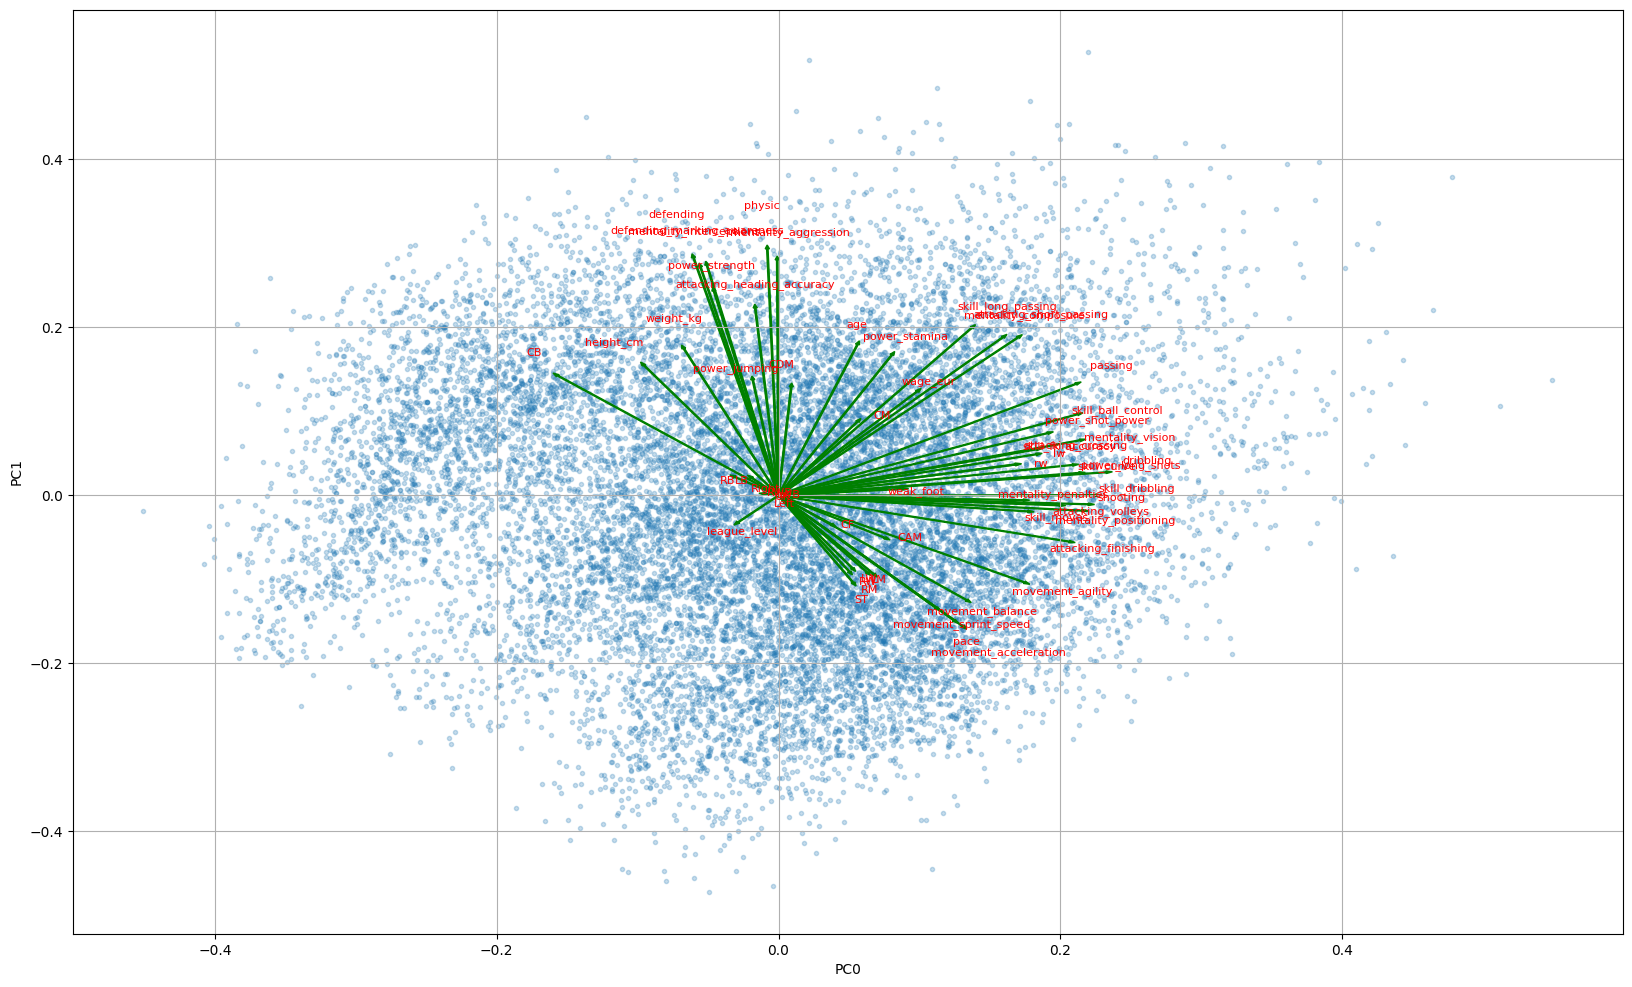

In [103]:
ggbiplot_pca(
    score = df_transformed.values[:,0:2],
    coeff = np.transpose(df_pca_components.values)[0:2, :].T,
    labels = numericColumns
)
plt.show()

In [104]:
criterium = 0.9
sum = np.cumsum(pca.explained_variance_ratio_)
for i in range(len(pca.explained_variance_ratio_)):
    val = sum[i]
    if val >= criterium:
        print(f'Number of components that satisfy percentage criterion of the explained variance: {i+1}')
        break

Number of components that satisfy percentage criterion of the explained variance: 24


In [105]:
pca_dict = {
        'Proportion of Variance': pca.explained_variance_ratio_,
        'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
    }
    
# summary
df_pca_summarize = pd.DataFrame.from_dict(
        data = pca_dict,
        columns = pca_cols[:len(numericColumns)],
        orient='index'
    )

<Axes: >

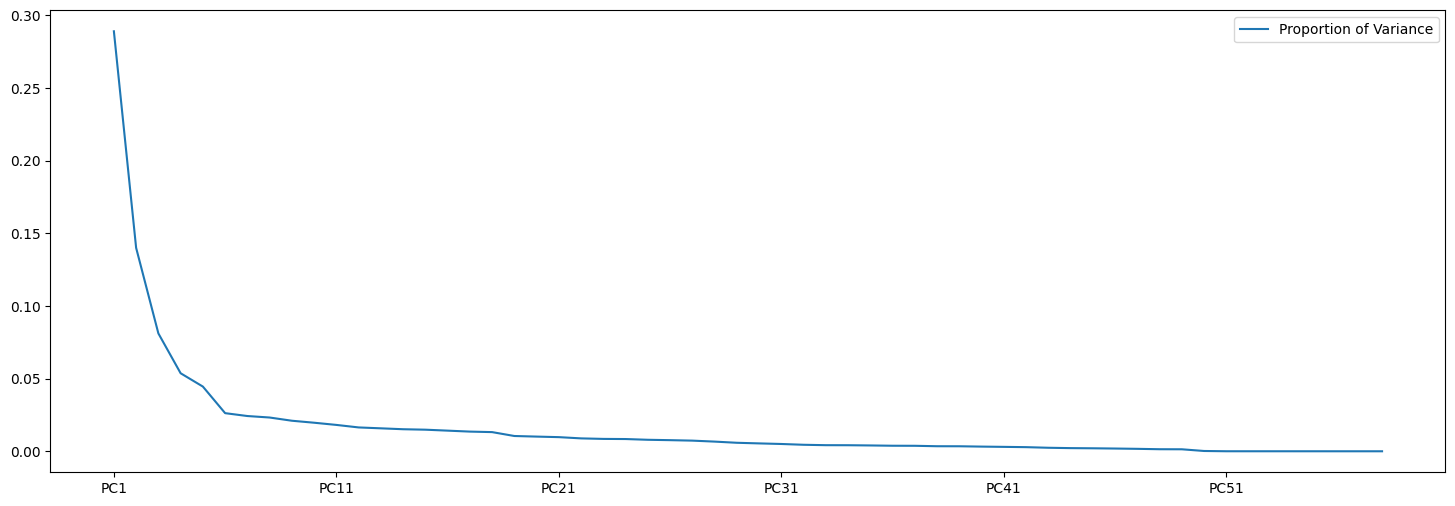

In [106]:
df_pca_summarize.T.plot.line(y=0, figsize=(18,6))

In [107]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dataNumeric, random_state=1, test_size=0.30)

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [120]:
def test_model(model, x_test, y_test):
    
    y_pred = model.predict(x_test)
    err = abs(y_pred - y_test)
    MAE = round(np.mean(err),2)
    RMSE = round(np.sqrt(((model.predict(x_test) - y_test)**2).mean()),2)
    print("MAE:", MAE, "RMSE:", RMSE)
    
    return err, y_pred

In [121]:
x_train = df_train.drop(['wage_eur'], axis=1)
y_train = df_train['wage_eur']

x_test = df_test.drop(['wage_eur'], axis=1)
y_test = df_test['wage_eur']

clf = DecisionTreeRegressor(max_depth = 20, random_state = 1)
clf = clf.fit(x_train, y_train)
    
err, y_pred = test_model(clf, x_test, y_test)

m = y_train.median()
m

MAE: 5717.12 RMSE: 13411.61


3000.0

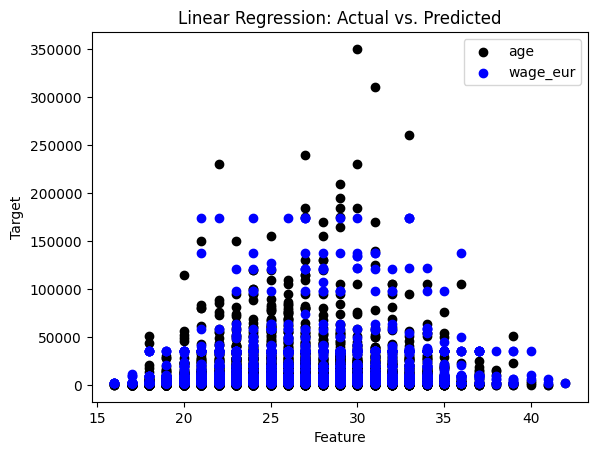

In [127]:
plt.scatter(x_test.iloc[:,0], y_test, color='black', label=x_test.columns[0])
plt.scatter(x_test.iloc[:,0], y_pred, color='blue', label='wage_eur')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()